In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
data=pd.read_csv("/content/Mall_Customers (1).csv")

In [15]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [16]:
data.shape

(200, 5)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [42]:
x=data.iloc[:,[3,4]].values

In [61]:
from sklearn.cluster import KMeans
wcss=[]

In [62]:
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

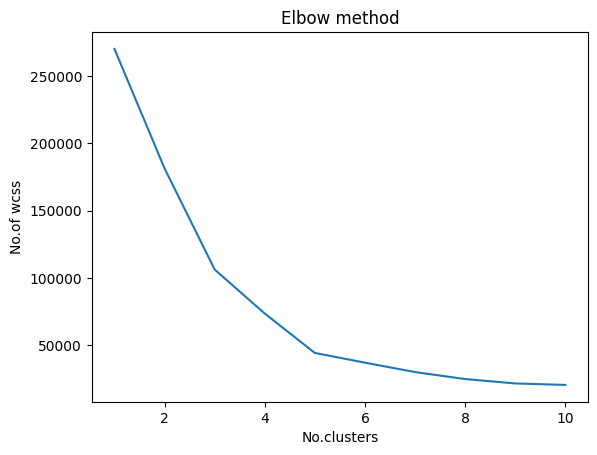

In [63]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No.clusters")
plt.ylabel("No.of wcss")
plt.show()

In [64]:
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_predict=kmeansmodel.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


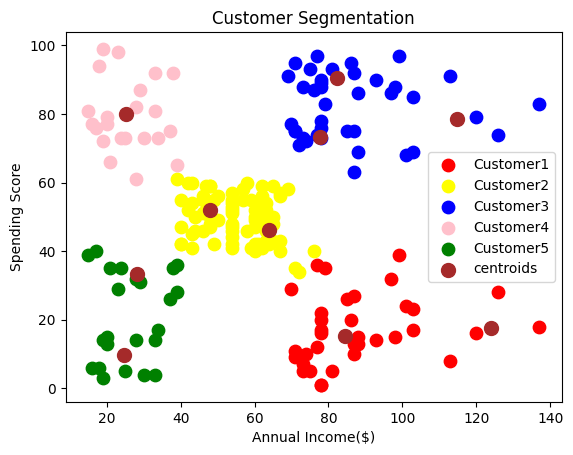

In [66]:
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=80,c="red",label="Customer1")
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=80,c="yellow",label="Customer2")
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=80,c="blue",label="Customer3")
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=80,c="pink",label="Customer4")
plt.scatter(x[y_predict==4,0],x[y_predict==4,1],s=80,c="green",label="Customer5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="brown",label="centroids")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income($)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()